# Multilayer film

## Calculation of band structure

In this example we will try to **calculate the band structure with the first 2 modes of propagation** in the periodic 1D multilayer film. This 1D photonic crystal can be characterized as:

<img src="media/multilayer_film.png" width="800">

First of all, we load the necessary modules:

In [1]:
import meep as mp
from meep import mpb
import numpy as np

import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 16})
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
# for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

We fix the resolution:

In [2]:
resolution = 128                                                  #we use a power of two number

We set the width of layers:

In [3]:
a = 1                                                             #arbitrary units
w = 0.5 * a

We set the two mediums, with three posibilities for the second medium:

In [4]:
Med_1 = mp.Medium(index=np.sqrt(13))
Med_2_array = np.array([mp.Medium(index=np.sqrt(13)),mp.Medium(index=np.sqrt(12)),mp.Medium(index=1)])
num = len(Med_2_array)

Now we define the supercell:

In [5]:
sc_z = 1 * a  # supercell width

geometry_lattice = mp.Lattice(size=mp.Vector3(0,0,sc_z))

Now we define the geometry of our problem (remember, that the geometry is centered at $0$ and then takes possitive and negative values around it):

In [6]:
geometry_array = list()
for i in range(num):
    geometry_array.append([mp.Block(size=mp.Vector3(mp.inf, mp.inf, w),
                     center=mp.Vector3(0,0,-0.5*w), material=Med_1),mp.Block(size=mp.Vector3(mp.inf, mp.inf, w),
                     center=mp.Vector3(0,0,+0.5*w), material=Med_2_array[i])])

We get the data for the permitivity to see if we constructed the unit cell correctly:

In [7]:
sim = mp.Simulation(resolution=128,
                    cell_size= mp.Vector3(0,0,1),
                    geometry=[mp.Block(size=mp.Vector3(mp.inf, mp.inf, w),
                     center=mp.Vector3(0,0,-0.5*w), material=Med_1),mp.Block(size=mp.Vector3(mp.inf, mp.inf, w),
                     center=mp.Vector3(0,0,+0.5*w), material=Med_2_array[2])])

sim.init_sim()

eps_data = sim.get_epsilon()

-----------
Initializing structure...
time for choose_chunkdivision = 6.91414e-06 s
Working in 3D dimensions.
Computational cell is 0.0078125 x 0.0078125 x 1 with resolution 128
     block, center = (0,0,-0.25)
          size (1e+20,1e+20,0.5)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (13,13,13)
     block, center = (0,0,0.25)
          size (1e+20,1e+20,0.5)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.00373411 s
-----------


Text(0, 0.5, '$\\varepsilon$(z)')

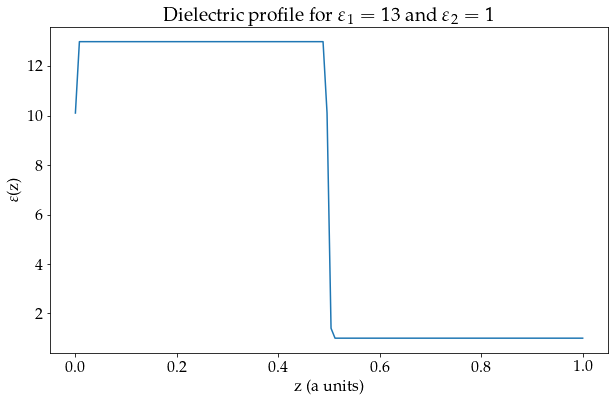

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(np.linspace(0,1,len(eps_data)),eps_data)
ax.set_title('Dielectric profile for $\\varepsilon_1=13$ and $\\varepsilon_2=1$')
ax.set_xlabel('z (a units)')
ax.set_ylabel('$\\varepsilon$(z)')

As we can see it fulfills the change of $\varepsilon$ at $z=0.5a$, as expected.

Now we set up the $k$-space (in our case we take into account that we want to check for the $k_z$ component):

In [9]:
num_bands = 6

num_k = 20
k_min = -0.5
k_max = 0.5

k_points = mp.interpolate(num_k, [mp.Vector3(0,0,k_min), mp.Vector3(0,0,k_max)])

We can now call the run function to compute the bands:

In [10]:
ms = mpb.ModeSolver(geometry_lattice=geometry_lattice,
                    geometry=geometry_array[2],
                    k_points=k_points,
                    resolution=resolution,
                    num_bands=num_bands);
ms.run();

Initializing eigensolver data
Computing 6 bands with 1e-07 tolerance
Working in 3 dimensions.
Grid size is 1 x 1 x 128.
Solving for 6 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 1, 0)
     (0, 0, 1)
Cell volume = 1
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 1, -0)
     (0, -0, 1)
Geometric objects:
     block, center = (0,0,-0.25)
          size (1e+20,1e+20,0.5)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (0,0,0.25)
          size (1e+20,1e+20,0.5)
          axes (1,0,0), (0,1,0), (0,0,1)
Geometric object tree has depth 1 and 4 object nodes (vs. 2 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: .
Initializing fields to random numbers...
22 k-points
  Vector3<0.0, 0.0, -0.5>
  Vector3<0.0, 0.0, -0.4523809523809524>
  Vector3<0.0, 0.0, -0.40476190476190477>
  Vector3<0.0, 0.0, -0.35714285714285715>
  Vector3<0.0, 0.0, -0.30952380952380953>
  V

We see that it works!

Now, we have passed everything down to `ms.py` and run for the three different geometries. We then generate some **band files** to plot them later. This was done by means of the `grep` command, i.e.: `grep freqs: data1.dat > bands_1.dat`. To access these files:

In [11]:
import os
path = os.path.abspath(os.getcwd())
print(path)

/home/ben/Desktop/Thesis/github/Thesis_name/Simulations/01_Multilayer_Film/General_Multilayer_Film


In [12]:
f1 = np.genfromtxt(path+"/data/bands_1.dat", delimiter=",")[:-1,1:]
f2 = np.genfromtxt(path+"/data/bands_2.dat", delimiter=",")[:-1,1:]
f3 = np.genfromtxt(path+"/data/bands_3.dat", delimiter=",")[:-1,1:]

Now we plot the first two bands:

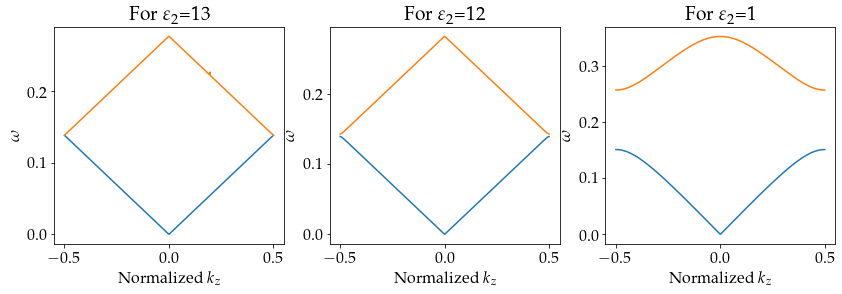

In [13]:
fig, ax = plt.subplots(1,3, figsize=(14,4))
f = [f1,f2,f3]
titles = ["For $\\varepsilon_2$=13","For $\\varepsilon_2$=12", "For $\\varepsilon_2$=1"]
for i in range(num):

    ax[i].plot(f[i][:,3], f[i][:,-8]) #in the files we calculated 8 bands, and we take the first 2! 
    ax[i].plot(f[i][:,3], f[i][:,-6]) # TE and TM modes will be the same so we jump by 2

    ax[i].set_title(titles[i])
    ax[i].set_xlabel("Normalized $k_z$")
    ax[i].set_ylabel("$\omega$")

In the first case, we expect the modes to lie along the light line: $\omega (k) = \frac{c k}{\sqrt(\varepsilon)}$.

We also see the **appearance of a band-gap when the contrast of dielectric index is increased**!

## Calculation of electromagnetic fields

Let's now see how to visualize the electric field related to both of these modes at the edge ($k=\frac{\pi}{a}$). First we simulate for the last geometry at the $k$ point:

In [14]:
ms = mpb.ModeSolver(geometry_lattice=geometry_lattice,
                    geometry=geometry_array[2],
                    k_points=[mp.Vector3(0,0,0.5)],
                    resolution=resolution,
                    num_bands=num_bands);
ms.run();

Initializing eigensolver data
Computing 6 bands with 1e-07 tolerance
Working in 3 dimensions.
Grid size is 1 x 1 x 128.
Solving for 6 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 1, 0)
     (0, 0, 1)
Cell volume = 1
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 1, -0)
     (0, -0, 1)
Geometric objects:
     block, center = (0,0,-0.25)
          size (1e+20,1e+20,0.5)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (0,0,0.25)
          size (1e+20,1e+20,0.5)
          axes (1,0,0), (0,1,0), (0,0,1)
Geometric object tree has depth 1 and 4 object nodes (vs. 2 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: .
Initializing fields to random numbers...
1 k-points
  Vector3<0.0, 0.0, 0.5>
elapsed time for initialization: 0.016577482223510742
solve_kpoint (0,0,0.5):
Solving for bands 1 to 6...
Finished solving for bands 1 to 6 after 9 iterations.
freqs:, 1, 0

Now we get the real part of the electric field and calculate three periods for visualization purposes:

In [15]:
efield1 = np.real(np.reshape(ms.get_efield(2)[:,:,:,0],resolution)) # X component of field
efield2 = np.real(np.reshape(ms.get_efield(3) [:,:,:,0],resolution)) # X component of field
efield1 = np.hstack([efield1,-efield1,efield1])
efield2 = np.hstack([efield2,-efield2,efield2])

Finally, we can plot the electric field for the first two bands on top of our geometry:

epsilon: 1-13, mean 7, harm. mean 1.87871, 50.7812% > 1, 50% "fill"


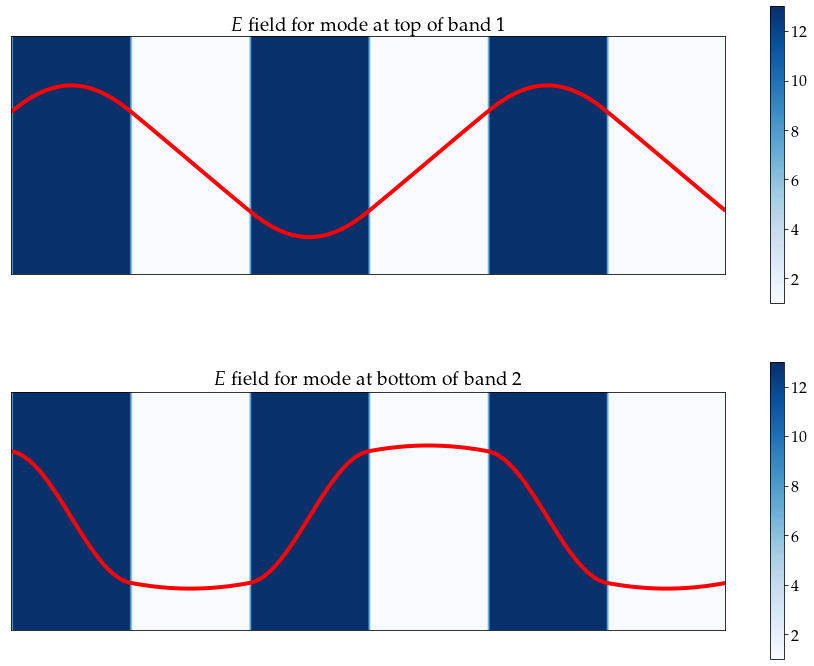

In [16]:
eps = ms.get_epsilon();

eps = np.hstack([eps,eps,eps])

eps = np.repeat(eps[np.newaxis, :], resolution, axis=0)

fig, ax = plt.subplots(2,1,figsize=(16,12))
pos0 = ax[0].imshow(eps, cmap='Blues')
fig.colorbar(pos0,ax=ax[0])
ax[0].plot(efield1*300+60, c='r', linewidth=4)
ax[0].invert_yaxis()
ax[0].set_title('$E$ field for mode at top of band $1$')
pos1 = ax[1].imshow(eps, cmap='Blues', )
fig.colorbar(pos1,ax=ax[1])
ax[1].plot(efield2*150+60, c='r', linewidth=4)
ax[1].invert_yaxis()
ax[1].set_title('$E$ field for mode at bottom of band $2$')
plt.tick_params(axis = "x", which = "both", bottom = False, top = False)

for axis in ax:
    axis.set_xticks([])
    axis.set_yticks([])

We can clearly see that **the electric field at top of band 1 has a higher frequency than the electric field at the bottom of band 2**!

Now, we want to see if the fields are stationary for different $k$-points. In theory, judging by the band structure, we should see that at $k=0$ and $k=\frac{\pi}{2 a}$ the group velocity goes to zero. This means that we expect stationary modes. At an intermediate $k$ we should see a propagating electric field. Let's put this to the test, starting with $k=\frac{\pi}{2 a}$:

In [17]:
efield1 = np.reshape(ms.get_efield(2)[:,:,:,0],resolution) # X component of field
efield2 = np.reshape(ms.get_efield(3) [:,:,:,0],resolution) # X component of field
efield1 = np.hstack([efield1,-efield1,efield1])
efield2 = np.hstack([efield2,-efield2,efield2])

In [18]:
def add_phase(field, phase):
    import cmath
    r = np.zeros(len(field))
    theta = np.zeros(len(field))
    for i in range(len(field)):
        r[i],theta[i] = cmath.polar(field[i])
    theta += np.ones(len(field))*phase
    new_field = np.zeros(np.shape(field), dtype=np.complex_)
    for i in range(len(field)):
        new_field[i] = cmath.rect(r[i],theta[i])
    return  new_field

In [19]:
phases = np.linspace(0, 2*np.pi, 360)
fields = np.zeros((len(phases),np.size(efield1)), dtype=np.complex_)
for i in range(len(phases)):
    fields[i, :] = add_phase(efield1, phases[i])
fields = np.real(fields)

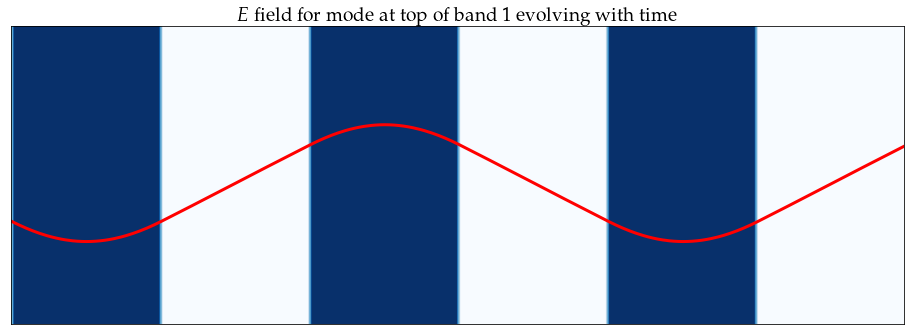

In [20]:
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')


fig, ax = plt.subplots(figsize=(16,12))
pos0 = ax.imshow(eps, cmap='Blues')
ax.invert_yaxis()
ax.set_title('$E$ field for mode at top of band $1$ evolving with time')
plt.tick_params(axis = "x", which = "both", bottom = False, top = False)
ax.set_xticks([])
ax.set_yticks([])
line, = ax.plot([], [], lw=3, c='red')


def init():
    line.set_data([], [])
    return line,
def animate(i):
    x = np.linspace(0,len(efield1),len(efield1))
    y = fields[i]*300+60
    line.set_data(x, y)
    return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=10, blit=True)


anim.save('media/electric_field1_k_edge.gif')

It looks as if the electric field is stationary, as we would expect!

Now, let's try for $k=0$:

In [21]:
ms = mpb.ModeSolver(geometry_lattice=geometry_lattice,
                    geometry=geometry_array[2],
                    k_points=[mp.Vector3(0,0,0)],
                    resolution=resolution,
                    num_bands=num_bands);
ms.run();

Initializing eigensolver data
Computing 6 bands with 1e-07 tolerance
Working in 3 dimensions.
Grid size is 1 x 1 x 128.
Solving for 6 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 1, 0)
     (0, 0, 1)
Cell volume = 1
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 1, -0)
     (0, -0, 1)
Geometric objects:
     block, center = (0,0,-0.25)
          size (1e+20,1e+20,0.5)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (0,0,0.25)
          size (1e+20,1e+20,0.5)
          axes (1,0,0), (0,1,0), (0,0,1)
Geometric object tree has depth 1 and 4 object nodes (vs. 2 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: .
Initializing fields to random numbers...
1 k-points
  Vector3<0.0, 0.0, 0.0>
elapsed time for initialization: 0.021028995513916016
solve_kpoint (0,0,0):
Solving for bands 3 to 6...
Finished solving for bands 3 to 6 after 11 iterations.
freqs:, 1, 0,

In [22]:
def get_dephase(field):
    import cmath
    _ , theta0 = cmath.polar(field[0])
    _ , theta1 = cmath.polar(field[-1])
    return (theta1-theta0)

In [23]:
efield1 = np.reshape(ms.get_efield(2)[:,:,:,0],resolution) # X component of field
dephase = get_dephase(efield1)
efield1 = np.hstack([np.real(efield1),np.real(add_phase(efield1, dephase)),np.real(add_phase(efield1, 2*dephase))])

We have to correct the phase so it makes sense!

epsilon: 1-13, mean 7, harm. mean 1.87871, 50.7812% > 1, 50% "fill"


[]

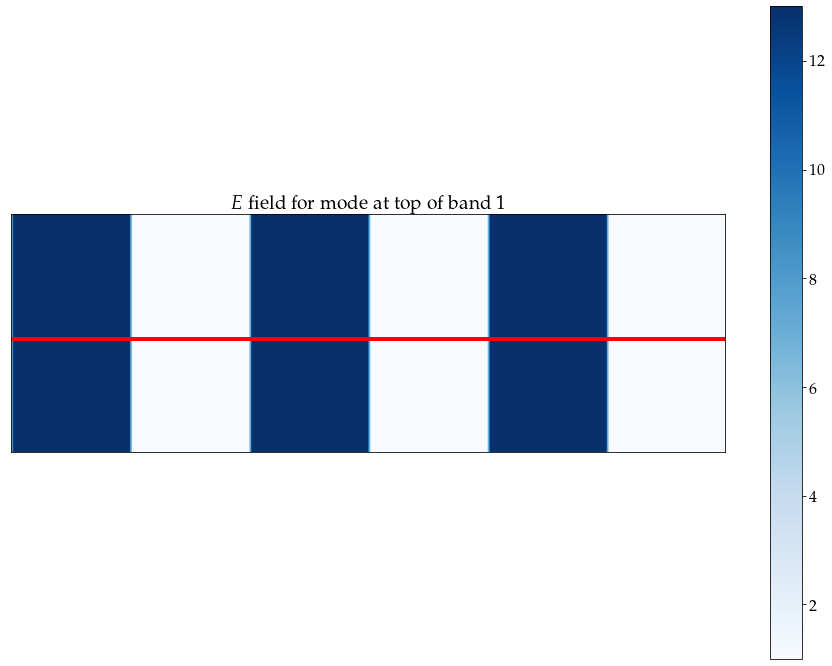

In [24]:
eps = ms.get_epsilon();

eps = np.hstack([eps,eps,eps])

eps = np.repeat(eps[np.newaxis, :], resolution, axis=0)

fig, ax = plt.subplots(figsize=(16,12))
pos0 = ax.imshow(eps, cmap='Blues')
fig.colorbar(pos0,ax=ax)
ax.plot(efield1+60, c='r', linewidth=4)
ax.invert_yaxis()
ax.set_title('$E$ field for mode at top of band $1$')
plt.tick_params(axis = "x", which = "both", bottom = False, top = False)

ax.set_xticks([])
ax.set_yticks([])

In [25]:
phases = np.linspace(0, 8*np.pi, 360)
fields = np.zeros((len(phases),np.size(efield1)), dtype=np.complex_)
for i in range(len(phases)):
    fields[i, :] = add_phase(efield1, phases[i])
fields = np.real(fields)

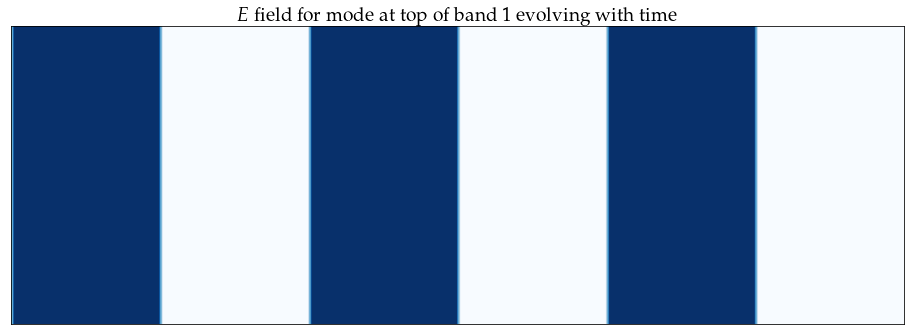

In [26]:
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')


fig, ax = plt.subplots(figsize=(16,12))
pos0 = ax.imshow(eps, cmap='Blues')
ax.invert_yaxis()
ax.set_title('$E$ field for mode at top of band $1$ evolving with time')
plt.tick_params(axis = "x", which = "both", bottom = False, top = False)
ax.set_xticks([])
ax.set_yticks([])
line, = ax.plot([], [], lw=3, c='red')


def init():
    line.set_data([], [])
    return line,
def animate(i):
    x = np.linspace(0,len(efield1),len(efield1))
    y = fields[i]*500+250
    line.set_data(x, y)
    return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)


anim.save('media/electric_field1_k_0.gif')

Now, let's try for $k=0.25$:

In [27]:
ms = mpb.ModeSolver(geometry_lattice=geometry_lattice,
                    geometry=geometry_array[2],
                    k_points=[mp.Vector3(0,0,0.25)],
                    resolution=resolution,
                    num_bands=num_bands);
ms.run();

Initializing eigensolver data
Computing 6 bands with 1e-07 tolerance
Working in 3 dimensions.
Grid size is 1 x 1 x 128.
Solving for 6 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 1, 0)
     (0, 0, 1)
Cell volume = 1
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 1, -0)
     (0, -0, 1)
Geometric objects:
     block, center = (0,0,-0.25)
          size (1e+20,1e+20,0.5)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (0,0,0.25)
          size (1e+20,1e+20,0.5)
          axes (1,0,0), (0,1,0), (0,0,1)
Geometric object tree has depth 1 and 4 object nodes (vs. 2 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: .
Initializing fields to random numbers...
1 k-points
  Vector3<0.0, 0.0, 0.25>
elapsed time for initialization: 0.015410661697387695
solve_kpoint (0,0,0.25):
Solving for bands 1 to 6...
Finished solving for bands 1 to 6 after 8 iterations.
freqs:, 1,

In [28]:
efield1 = np.reshape(ms.get_efield(2)[:,:,:,0],resolution) # X component of field
dephase = get_dephase(efield1)
efield1 = np.hstack([np.real(efield1),np.real(add_phase(efield1, dephase)),np.real(add_phase(efield1, 2*dephase))])

epsilon: 1-13, mean 7, harm. mean 1.87871, 50.7812% > 1, 50% "fill"


[]

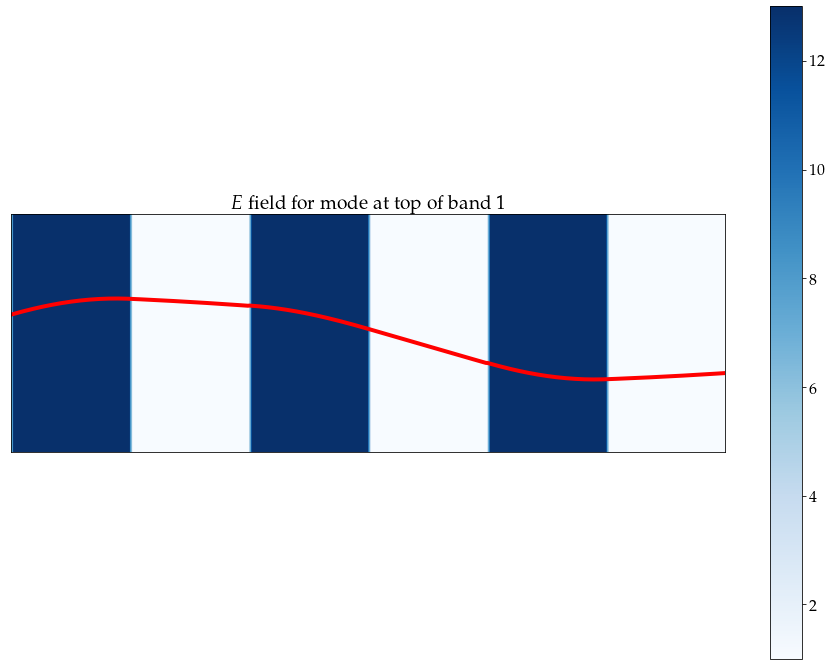

In [29]:
eps = ms.get_epsilon();

eps = np.hstack([eps,eps,eps])

eps = np.repeat(eps[np.newaxis, :], resolution, axis=0)

fig, ax = plt.subplots(figsize=(16,12))
pos0 = ax.imshow(eps, cmap='Blues')
fig.colorbar(pos0,ax=ax)
ax.plot(efield1*100+60, c='r', linewidth=4)
ax.invert_yaxis()
ax.set_title('$E$ field for mode at top of band $1$')
plt.tick_params(axis = "x", which = "both", bottom = False, top = False)

ax.set_xticks([])
ax.set_yticks([])

The dephase doesn't seem to have worked perfectly, probably due to our space discretization with the resolution!

In [30]:
efield1 = np.reshape(ms.get_efield(2)[:,:,:,0],resolution)
dephase = get_dephase(efield1)
efield1 = np.hstack([efield1,add_phase(efield1, dephase),add_phase(efield1, 2*dephase)])

phases = np.linspace(0, 8*np.pi, 360)
fields = np.zeros((len(phases),np.size(efield1)), dtype=np.complex_)
for i in range(len(phases)):
    fields[i, :] = add_phase(efield1, phases[i])
fields = np.real(fields)

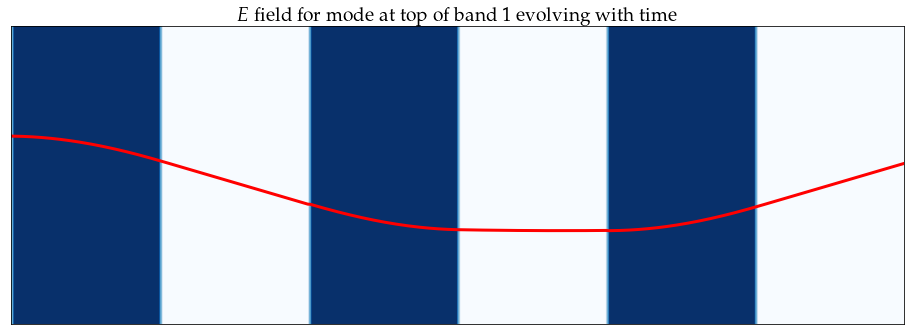

In [31]:
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')


fig, ax = plt.subplots(figsize=(16,12))
pos0 = ax.imshow(eps, cmap='Blues')
ax.invert_yaxis()
ax.set_title('$E$ field for mode at top of band $1$ evolving with time')
plt.tick_params(axis = "x", which = "both", bottom = False, top = False)
ax.set_xticks([])
ax.set_yticks([])
line, = ax.plot([], [], lw=3, c='red')


def init():
    line.set_data([], [])
    return line,
def animate(i):
    x = np.linspace(0,len(efield1),len(efield1))
    y = fields[i]*100+60
    line.set_data(x, y)
    return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)


anim.save('media/electric_field1_k_middle.gif')

## Calculation of electromagnetic fields

Now we want to check the electric energy density of the field to understand the nature of the gap:

In [32]:
ms = mpb.ModeSolver(geometry_lattice=geometry_lattice,
                    geometry=geometry_array[2],
                    k_points=[mp.Vector3(0,0,0.5)],
                    resolution=resolution,
                    num_bands=num_bands);
ms.run();

Initializing eigensolver data
Computing 6 bands with 1e-07 tolerance
Working in 3 dimensions.
Grid size is 1 x 1 x 128.
Solving for 6 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 1, 0)
     (0, 0, 1)
Cell volume = 1
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 1, -0)
     (0, -0, 1)
Geometric objects:
     block, center = (0,0,-0.25)
          size (1e+20,1e+20,0.5)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (0,0,0.25)
          size (1e+20,1e+20,0.5)
          axes (1,0,0), (0,1,0), (0,0,1)
Geometric object tree has depth 1 and 4 object nodes (vs. 2 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: .
Initializing fields to random numbers...
1 k-points
  Vector3<0.0, 0.0, 0.5>
elapsed time for initialization: 0.024991273880004883
solve_kpoint (0,0,0.5):
Solving for bands 1 to 6...
Finished solving for bands 1 to 6 after 9 iterations.
freqs:, 1, 0

In [33]:
ms.get_dfield(2)
ms.compute_field_energy()
N = 128
energy0 = np.zeros(N)
for i in range(N):
    energy0 [i] = ms.get_energy_point(mp.Vector3(0,0,-0.5+(i/N)))
energy0 = np.hstack([energy0,energy0,energy0])

D-energy-components:, 1, 2, 0.431128, 0.568872, 0


In [34]:
ms.get_dfield(3)
ms.compute_field_energy()
energy1 = np.zeros(N)
for i in range(N):
    energy1 [i] = ms.get_energy_point(mp.Vector3(0,0,-0.5+(i/N)))
energy1 = np.hstack([energy1,energy1,energy1])

D-energy-components:, 1, 3, 0.411017, 0.588983, 0


epsilon: 1-13, mean 7, harm. mean 1.87871, 50.7812% > 1, 50% "fill"


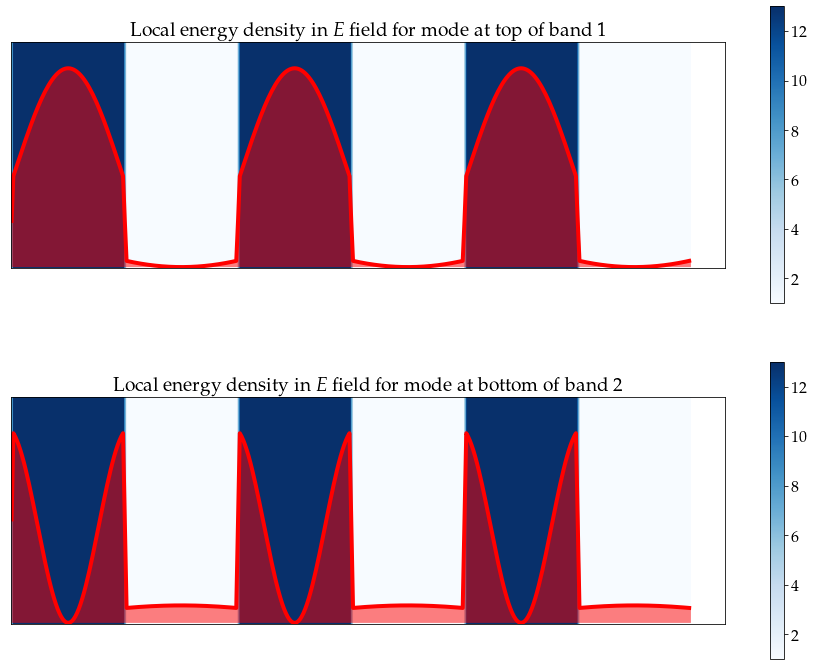

In [35]:
eps = ms.get_epsilon();

eps = np.hstack([eps,eps,eps])

eps = np.repeat(eps[np.newaxis, :], resolution, axis=0)

fig, ax = plt.subplots(2,1,figsize=(16,12))
pos0 = ax[0].imshow(eps, cmap='Blues')
fig.colorbar(pos0,ax=ax[0])
ax[0].plot(energy0*45, c='r', linewidth=4)
ax[0].invert_yaxis()
ax[0].set_title('Local energy density in $E$ field for mode at top of band $1$')
pos1 = ax[1].imshow(eps, cmap='Blues', )
ax[0].fill_between(np.linspace(0,resolution*3,resolution*3),energy0*45, facecolor='red', alpha=0.5)
fig.colorbar(pos1,ax=ax[1])
ax[1].plot(energy1*30, c='r', linewidth=4)
ax[1].fill_between(np.linspace(0,resolution*3,resolution*3),energy1*30, facecolor='red', alpha=0.5)
ax[1].invert_yaxis()
ax[1].set_title('Local energy density in $E$ field for mode at bottom of band $2$')
plt.tick_params(axis = "x", which = "both", bottom = False, top = False)

for axis in ax:
    axis.set_xticks([])
    axis.set_yticks([])

As we can see, **the energy tends to concentrate around high-$\varepsilon$ layers!** The gap arises from the difference in energy location.